## Setup

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.v2 as transforms

from pothole.boxes import xyxy_to_xywh
from pothole.datasets import PotholeDataset
from pothole.plot import show_with_bbs

plt.rcParams['figure.figsize'] = [16.0, 12.0] # default: [6.4, 4.8]

In [2]:
def show_samples_grid(images, rows, cols, offset=0):
    image_slice = slice(offset, offset + rows*cols)

    fig, axes = plt.subplots(rows, cols)

    fig.canvas.header_visible = False

    for ax, (i, img) in zip(axes.flat, enumerate(images[image_slice], start=offset)):
        ax.imshow(img)
        ax.set_title(f'Sample {i}')
        ax.set_axis_off()

def show_sample(sample_number):
    image = images[sample_number]
    boxes = list(map(xyxy_to_xywh, targets[sample_number]))

    fig, ax = plt.subplots()

    fig.canvas.header_visible = False
    fig.suptitle(f'Sample {sample_number}\n({len(boxes)} bounding boxes)')


    show_with_bbs(ax, image, boxes)

    ax.set_axis_off()

In [3]:
image_transform = transforms.Compose(
    [
        transforms.ToDtype(torch.float32, scale=True),
        np.array,
    ]
)
allset = PotholeDataset('all', image_transform=image_transform)
images, targets = list(zip(*allset))

## List a sample of the images in a grid

Hint: If using the default 3x5 grid, try varying `page` in the interval [0,44].

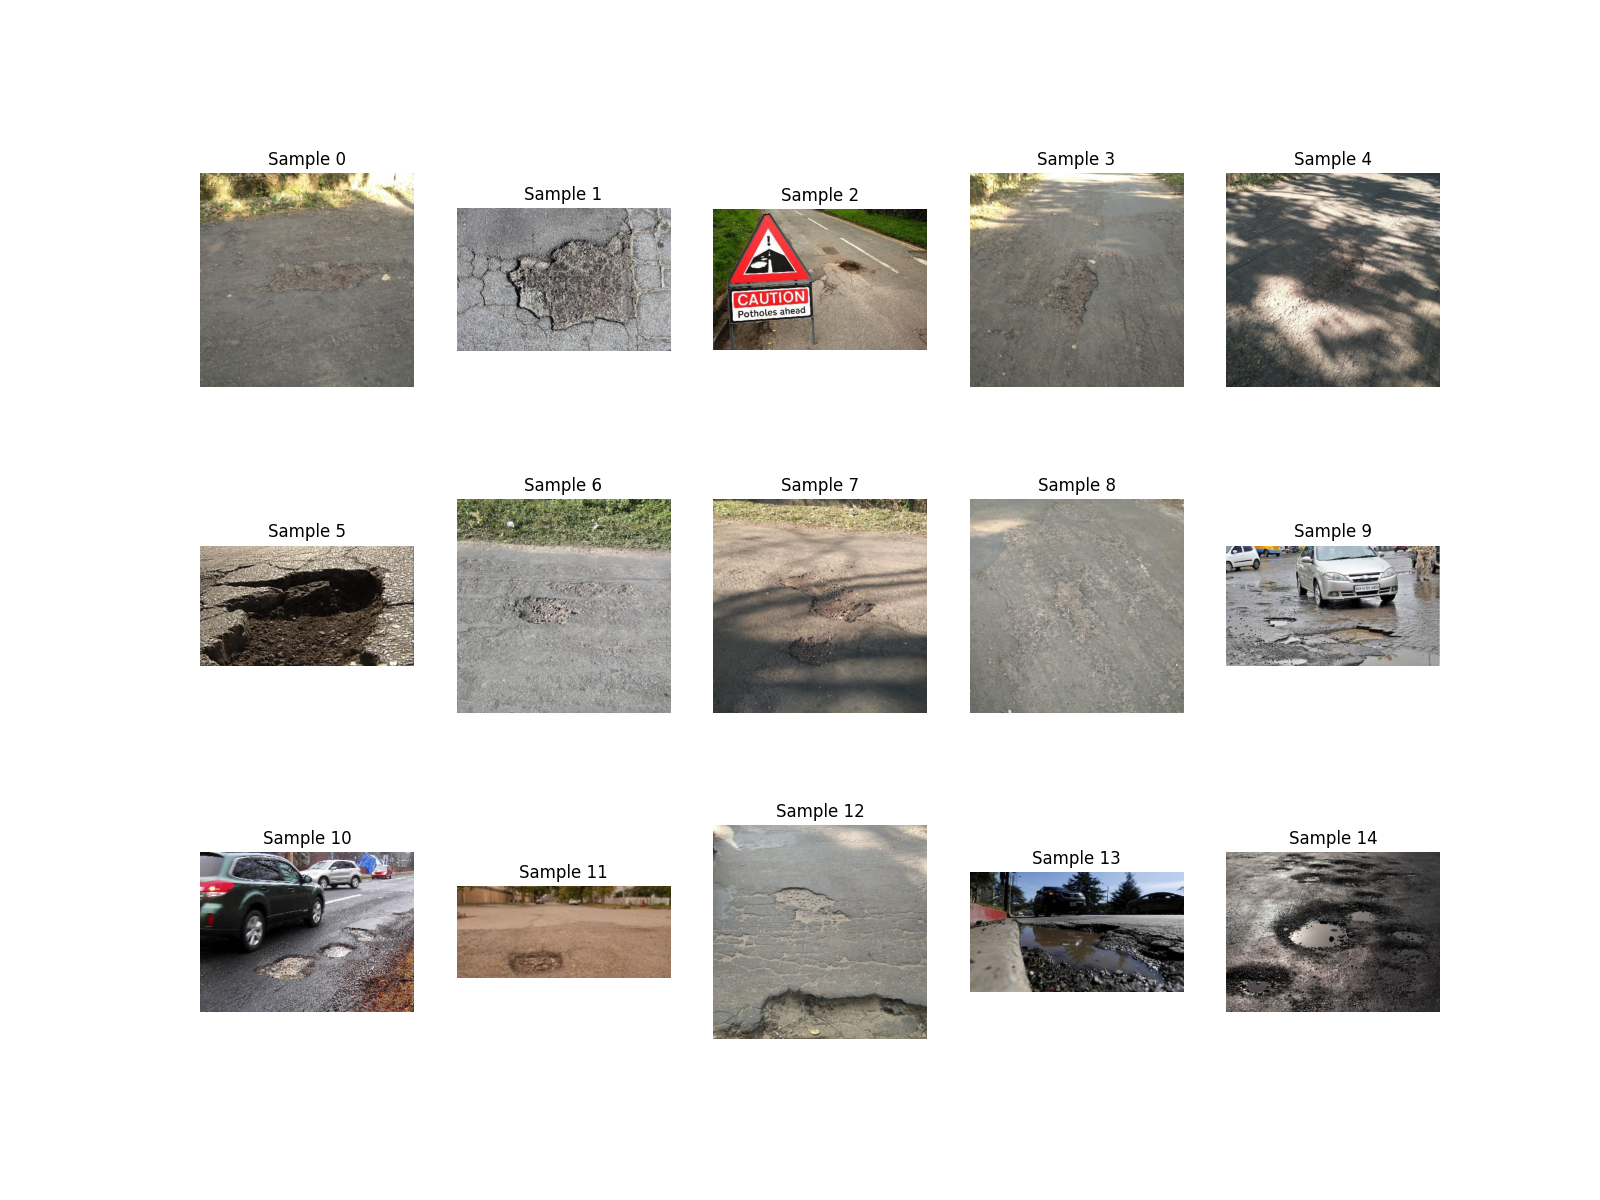

In [4]:
page = 0
rows, cols = 3, 5
show_samples_grid(images, rows, cols, offset=page*rows*cols)

## Show target boxes

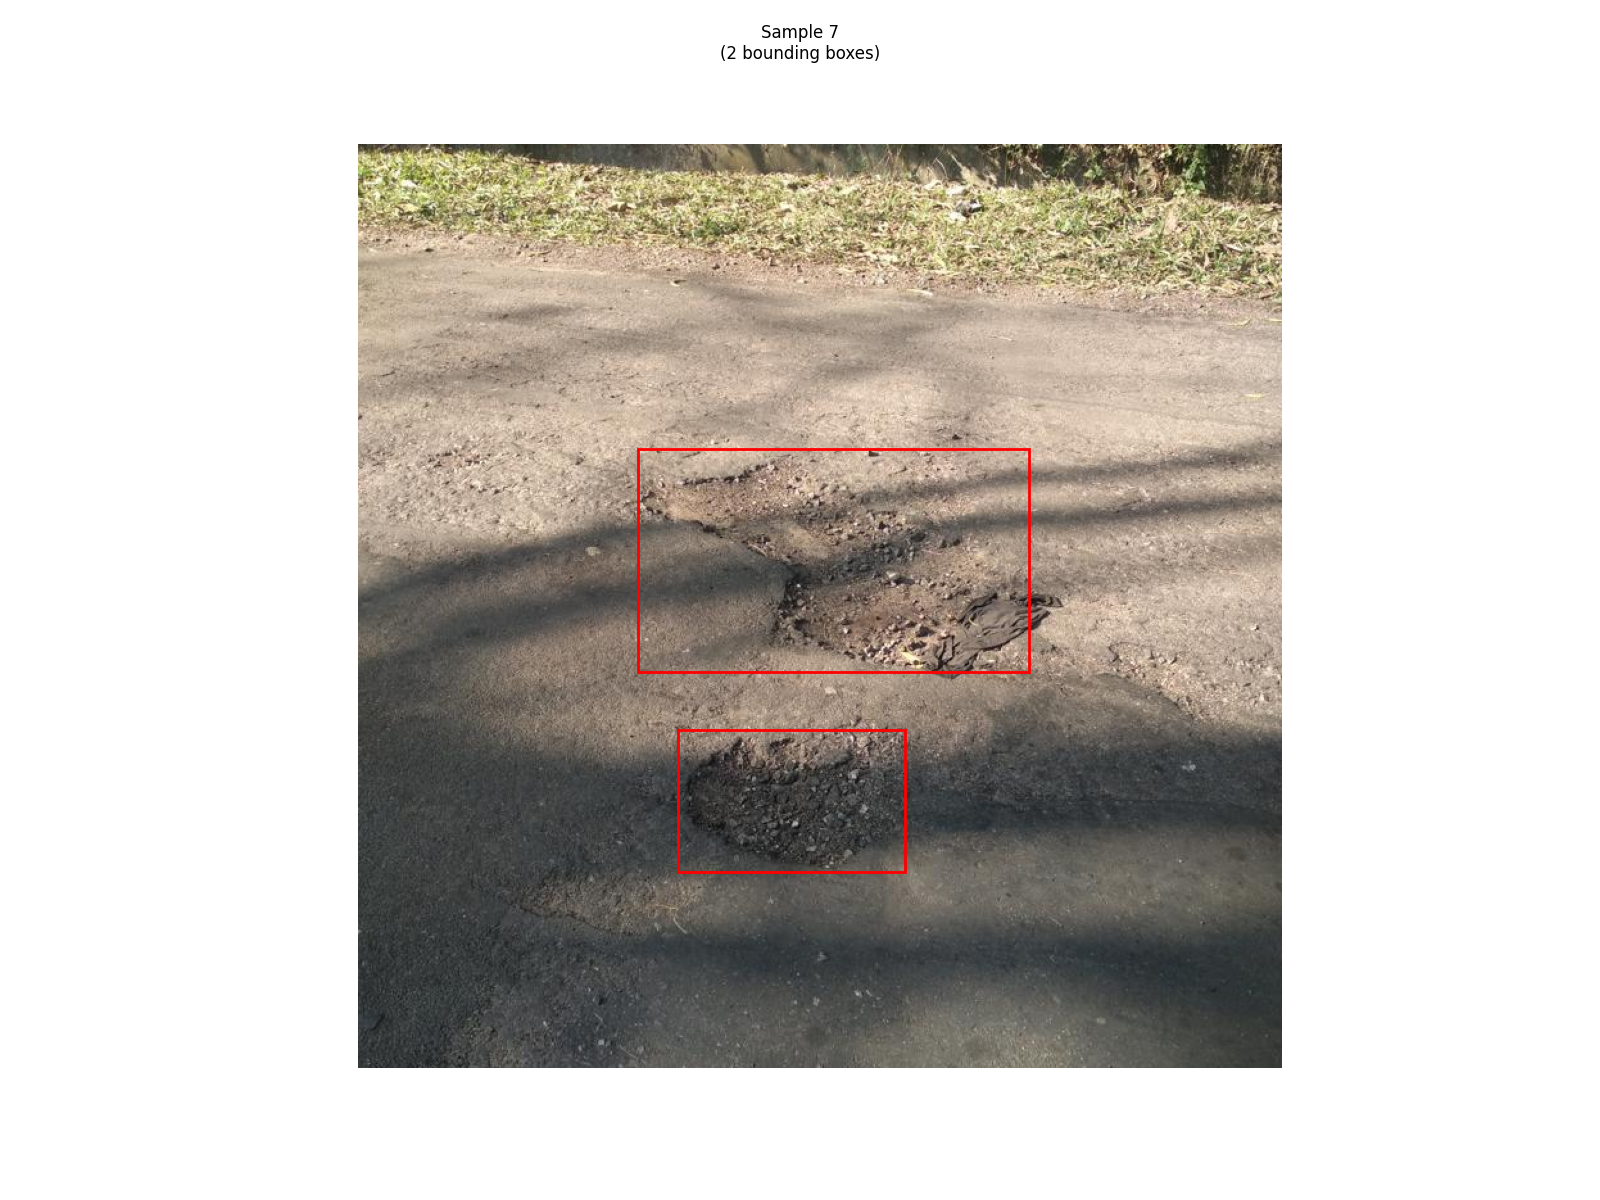

In [5]:
show_sample(7)